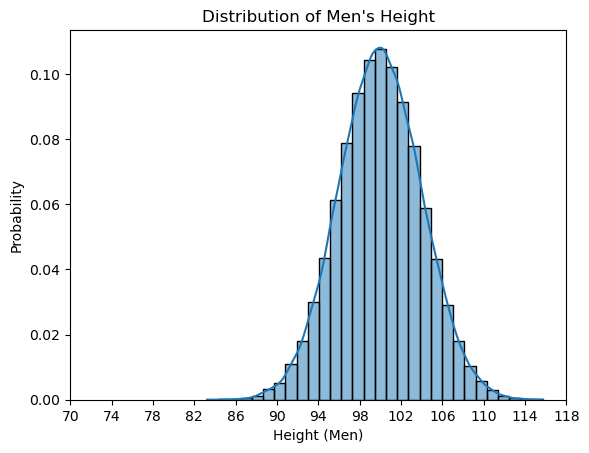

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

mu,sigma=100,4
data=np.random.normal(mu,sigma,100000)
sns.histplot(data,bins=30,kde=True,stat='probability')
plt.xlabel('Height (Men)')
plt.ylabel('Probability')
plt.title("Distribution of Men's Height")
plt.xticks(range(70,120,4))
plt.show()

# **Properties of a Normal Distribution**<br>
It is shaped like a bell curve and symmetric about its mean.<br>
Since it is symmetric about the mean, which is the peak of the curve (50% values less than mean and 50% values greater than mean), its mode and median are equal to its mean.<br>
# **The empirical rule or the 68–95–99 rule: In a normal distribution:<br>**
Around 68% of values lie within 1 standard deviation from the mean<br>
Around 95% values lie between 2 standard deviations from the mean<br>
Around 99.7% values lie between 3 standard deviations from the mean<br>

## **Standard Normal Distribution**
A standard normal distribution is a normal distribution with a mean of 0 and a standard deviation of 1.

Any normal distribution can be converted to a standard normal distribution by finding the z-score for all the values. This is called standardizing the distribution.

A z-score for a particular value answers the question: how many standard deviations away from mean is it? It is given by:

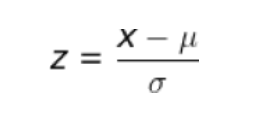 <br>
So, in order to find the z-score of a value, subtract the mean from it and divide the difference by standard deviation.


In [ ]:
data = (data - mu)/sigma

#Proving the empirical rule
one_sd = len(data[(data>-1) & (data<1)])/len(data)*100
two_sd = len(data[(data>-2) & (data<2)])/len(data)*100
three_sd = len(data[(data>-3) & (data<3)])/len(data)*100

print('Percentage of data within one standard deviation:', round(one_sd,2))
print('Percentage of data within two standard deviation:', round(two_sd,2))
print('Percentage of data within three standard deviation:', round(three_sd,2))

Percentage of data within one standard deviation: 68.17
Percentage of data within two standard deviation: 95.44
Percentage of data within three standard deviation: 99.79


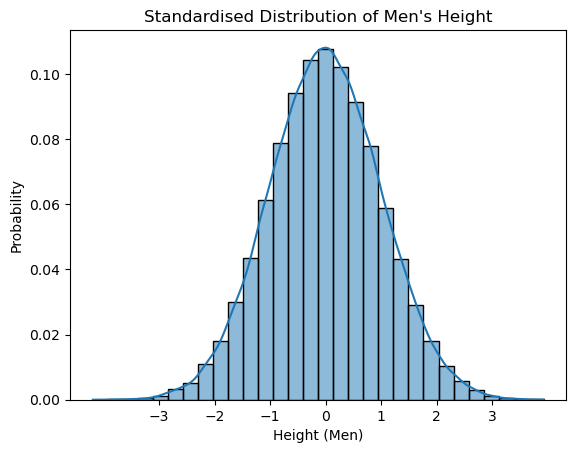

In [ ]:

#Plotting the z-scores
sns.histplot(data, bins=30, kde=True, stat='probability')
plt.xlabel('Height (Men)')
plt.ylabel('Probability')
plt.xticks(range(-3,4,1))
plt.title("Standardised Distribution of Men's Height")
plt.show()

# QQ Plot:<br>
 A Q-Q plot (Quantile-Quantile Plot) compares the quantiles/z-scores of the data against the quantiles of a theoretical normal distribution. A function in python’s statsmodels library called qqplot can be used to create the plot:

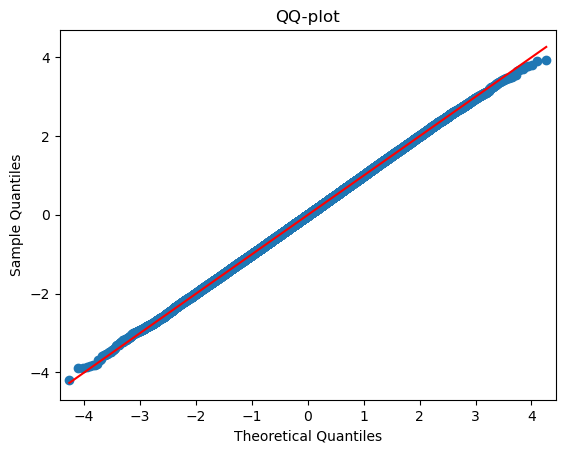

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fig=sm.qqplot(data,line='s')
plt.title('QQ-plot')
plt.show()

# **Shapiro-Wilk Test and Kolmogrov-Smirnoff test (KSTest):**
 These are statistical tests that checks the null hypothesis that the data is gaussian (normally distributed). They calculate a test statistic and provide a p-value. If the p-value is greater than the chosen significance level (e.g., 0.05), it suggests that the data follows a normal distribution. However, these tests may not be reliable for large sample sizes.

In [ ]:
import numpy as np
from scipy.stats import norm
from scipy.stats import shapiro, kstest
# Shapiro Test for Normality
test_stat, p_value = shapiro(data)

print('Result of Shapiro Test:')
if p_value < 0.05:
  print('Reject H0')
  print('Data is not Gaussian')
else:
  print('Fail to reject H0')
  print('Data is Gaussian')

# Kolmogrov-Smirnoff Test for Normality
test_stat, p_value = kstest(data, norm.cdf,
                            args=(data.mean(), data.std()))

print('-'*20,'\nResult of KS Test:')
if p_value < 0.05:
  print('Reject H0')
  print('Data is not Gaussian')
else:
  print('Fail to reject H0')
  print('Data is Gaussian')

Result of Shapiro Test:
Fail to reject H0
Data is Gaussian
-------------------- 
Result of KS Test:
Fail to reject H0
Data is Gaussian


C:\Users\ML\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)
